In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/AngelUrielLopezVazquez/INTROCD/refs/heads/main/Base_Limpia.csv"
df = pd.read_csv(url, encoding='utf-8')
pd.set_option('display.max_columns', None)
df

,Id,Año,Mes,Dia,Fecha,Duracion_Mayor_1,Pais_Id,Pais,Region_Id,Region,Provincia/Estado,Ciudad,Latitud,Longitud,Especifidad_Geografica_Id,Cercania_Ciudad,Criterio_1,Criterio_2,Criterio_3,Dudas_Terrorismo,Ataque_Multiple,Ataque_Exitoso,Ataque_Suicida,Tipo_Ataque_Id,Tipo_Ataque,Objetivo_Ataque_Id,Objetivo_Ataque,Objetivo_Ataque_Subtipo_Id,Objetivo_Ataque_Subtipo,Nacionalidad_Objetivo_Id,Nacionalidad_Objetivo,Perpetrador,Inceridumbre_Perpetrador,Lobo_Solitario,Numero_Atacantes,Tipo_Arma_Id,Tipo_Arma,Sutipo_Arma_Id,Sutipo_Arma,Muertos,Heridos,Daño_Propiedad,Grado_Daños_Propiedad_Id,Grado_Daños_Propiedad,Secuestro/Rehenes,Rescate,Base_Datos,Logisticamente_Internacional,Ideologicamente_Internacional,Miscelaneamente_Internacional,Ataque_Internacional,Especifidad_Geografica,Ciudad_Id,Perpetrador_Id,Provincia/Estado_Id
0,2,1970,6,15,1970-06-15,0,130,México,1,América del Norte,Federal,Mexico city,19.371887,-99.086624,1,0,1,1,1,0,0,1,0,6,Toma de rehenes (Secuestro),7,Gobierno (Diplomático),45,"Personal Diplomático (fuera de embajada, consu...",21,Bélgica,23rd of September Communist League,0,0,7,13,Desconocido,0,Desconocido,0,0,0,4,Desconocido,1,1,PGIS,0,1,1,1,"En ciudad/pueblo, coordenadas exactas",1,1,1
1,3,1970,1,15,1970-01-15,0,160,Filipinas,5,Asia Sudeste,Tarlac,Desconocido,15.478598,120.599741,4,0,1,1,1,0,0,1,0,1,Asesinato,10,Periodistas y Medios,54,Periodista/Personal/Instalación de Radio,217,Estados Unidos,Desconocido,0,0,22,13,Desconocido,0,Desconocido,1,0,0,4,Desconocido,0,0,PGIS,-1,-1,1,1,Coordenadas del centro de la región principal,2,2,2
2,4,1970,1,15,1970-01-15,0,78,Grecia,8,Europa Occidental,Attica,Athens,37.997490,23.762728,1,0,1,1,1,0,0,1,0,3,Bombardeo/Explosión,7,Gobierno (Diplomático),46,Embajada/Consulado,217,Estados Unidos,Desconocido,0,0,22,6,Explosivos,16,Tipo de explosivo desconocido,2,3,1,4,Desconocido,0,0,PGIS,-1,-1,1,1,"En ciudad/pueblo, coordenadas exactas",3,2,3
3,5,1970,1,15,1970-01-15,0,101,Japón,4,Asia Oriental,Fukouka,Fukouka,33.580412,130.396361,1,0,1,1,1,0,0,1,0,7,Ataque a instalaciones/infraestructura,7,Gobierno (Diplomático),46,Embajada/Consulado,217,Estados Unidos,Desconocido,0,0,22,8,Incendiario,0,Desconocido,2,3,1,4,Desconocido,0,0,PGIS,-1,-1,1,1,"En ciudad/pueblo, coordenadas exactas",4,2,4
4,6,1970,1,2,1970-01-02,0,218,Uruguay,3,América del Sur,Montevideo,Montevideo,-34.891151,-56.187214,1,0,1,1,1,0,0,0,0,1,Asesinato,3,Policía,25,Fuerzas/Oficiales de Seguridad de la Policía,218,Uruguay,Tupamaros (Uruguay),0,0,3,5,Armas de Fuego,2,Rifle automático o semiautomático,0,0,0,4,Desconocido,0,0,PGIS,0,0,0,0,"En ciudad/pueblo, coordenadas exactas",5,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60213,70399,2014,5,28,2014-05-28,0,153,Pakistán,6,Asia del Sur,Sindh,Karachi,24.891115,67.143311,1,0,1,1,1,0,0,1,0,2,Asalto armado,1,Negocios,7,Comercio/Almacén/Panadería,153,Pakistán,Desconocido,0,0,2,5,Armas de Fuego,5,Tipo de arma de fuego desconocido,1,0,0,4,Desconocido,0,-1,START Primary Collection,-1,-1,0,-1,"En ciudad/pueblo, coordenadas exactas",557,2,252
60214,70400,1982,7,21,1982-07-21,0,185,España,8,Europa Occidental,Basque Country,Bilbao,43.258434,-2.921819,1,0,1,1,0,1,0,1,0,3,Bombardeo/Explosión,4,Militar,35,Transporte/ Vehículo Militar (excluyendo convoys),185,España,Basque Fatherland and Freedom (ETA),0,0,22,6,Explosivos,16,Tipo de explosivo desconocido,0,3,1,3,Menor (probablemente < $1 millón),0,0,PGIS,0,1,0,1,"En ciudad/pueblo, coordenadas exactas",343,57,389
60215,70401,2009,9,14,2009-09-14,0,153,Pakistán,6,Asia del Sur,Sindh,Karachi,24.891115,67.143311,1,0,1,1,1,0,0,1,0,2,Asalto armado,1,Negocios,1,Gas/Petróleo/Eléctrico,153,Pakistán,Tehrik-i-Taliban Pakistan (TTP),0,0,3,5,Armas de Fuego,2,Rifle automático o semiautomático,1,0,0,4,Desconocido,0,-1,ISVG,0,0,0,0,"En ciudad/pueblo, coordenadas exactas",557,2080,252
60216,70

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
numeric_df = df.select_dtypes(include=[np.number])

In [99]:
from sklearn.model_selection import train_test_split

X = numeric_df[['Año', 'Pais_Id', 'Ataque_Suicida', 'Tipo_Ataque_Id', 'Objetivo_Ataque_Id','Nacionalidad_Objetivo_Id','Rescate', 'Daño_Propiedad','Perpetrador_Id']]
y = numeric_df['Muertos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42)

regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

RMSE: 10.031017003866978
MSE: 100.62130213186846
MAE: 2.9614692748292444
R²: -0.12002311482196948


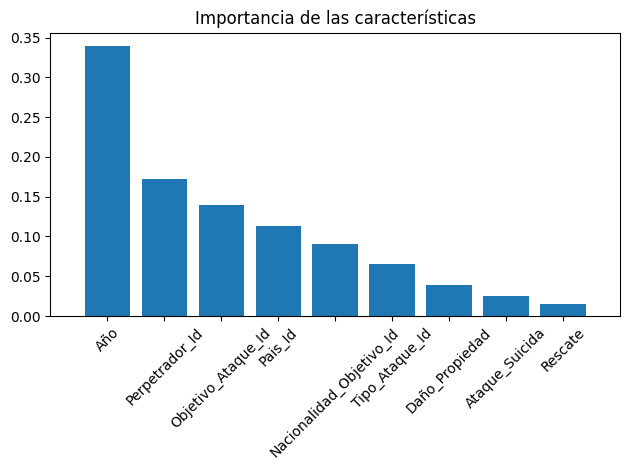

In [102]:
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


In [106]:
import pandas as pd
data = pd.DataFrame([[2024, 130, 1, 7, 1, 130, 0, 0, 2]], 
                             columns=['Año', 'Pais_Id', 'Ataque_Suicida', 'Tipo_Ataque_Id', 'Objetivo_Ataque_Id','Nacionalidad_Objetivo_Id','Rescate', 'Daño_Propiedad','Perpetrador_Id'])

pred = regressor.predict(data)
print(f"Predicción del número de muertos: {pred[0]}")


Predicción del número de muertos: 14.1525
